## Step 1: 데이터 준비 및 충북대학교 캠퍼스 네트워크 생성

### 목표
충북대학교 캠퍼스와 주변의 도로망 데이터를 OpenStreetMap(OSM)에서 추출하여 경로 탐색 알고리즘(다익스트라, 벨만-포드 등)에 사용할 네트워크 데이터를 준비합니다.

---

### 진행 과정

#### 1. OpenStreetMap 데이터를 사용하여 도로망 생성
- 충북대학교 중심 좌표 `(36.6284, 127.4568)`를 기준으로 반경 `580m` 내의 도로망 데이터를 가져왔습니다.
- 도보 경로를 포함하기 위해 `network_type="walk"`로 설정했습니다.
- OpenStreetMap 데이터를 기반으로 노드와 엣지가 포함된 그래프 형태의 네트워크가 생성되었습니다.
- 생성된 네트워크의 결과:
  - **노드 수**: 797
  - **엣지 수**: 1097

---

#### 2. 도로망 시각화
- 생성된 네트워크 데이터를 시각화하여 도로망이 제대로 가져와졌는지 확인했습니다.
- 시각화 결과:
  - 각 노드(점)는 도로망의 지점을 나타내며, 엣지(선)는 노드 간의 연결을 나타냅니다.
  - 충북대학교 캠퍼스와 주변의 도로망이 시각적으로 확인되었습니다.

---

#### 3. 노드와 엣지 데이터 확인
- 생성된 네트워크에서 노드와 엣지 데이터를 분리하여 확인했습니다.
  - **노드(Node)**: 도로망의 각 지점을 나타내며, 좌표(`x`, `y`) 정보가 포함됩니다.
  - **엣지(Edge)**: 도로망의 연결 정보를 포함하며, 거리 등 추가 속성이 포함됩니다.
- 데이터 확인 결과:
  - 노드와 엣지 데이터가 잘 정의되어 있으며, 경로 탐색 알고리즘에 바로 사용할 수 있는 상태입니다.


/home/gyuha_lee/miniconda3/envs/oldandnew/lib/python3.9/site-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


Graph with 797 nodes and 2068 edges.


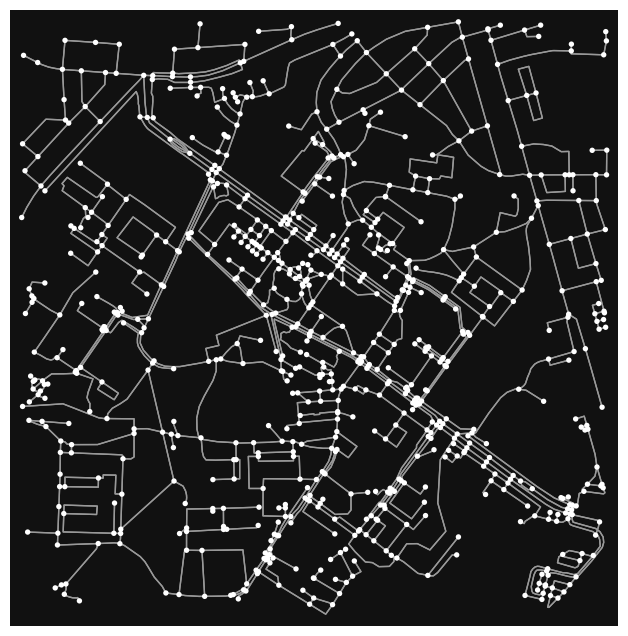

Number of nodes: 797
Number of edges: 2068


In [1]:
import osmnx as ox

# 충북대학교 중심 좌표와 반경으로 도로망 가져오기
def get_osm_network_from_point(center_point=(36.6284, 127.4568), dist=580):
    G = ox.graph_from_point(center_point, dist=dist, network_type="walk")
    print(f"Graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
    return G


network = get_osm_network_from_point()
ox.plot_graph(network)
print(f"Number of nodes: {network.number_of_nodes()}")
print(f"Number of edges: {network.number_of_edges()}")


In [2]:
# 노드, 엣지 데이터 추출
nodes, edges = ox.graph_to_gdfs(network)

### nodes 데이터의 주요 컬럼 설명

#### osmid
- OpenStreetMap에서 노드를 식별하기 위한 고유 ID.
- 도로망에서 특정 지점을 나타내며, 노드 간 연결을 통해 엣지가 형성됩니다.

#### y (위도)
- 노드의 위도(Latitude) 좌표.
- 지리적 위치를 나타내며, 시각화 및 경로 탐색 알고리즘에서 사용됩니다.

#### x (경도)
- 노드의 경도(Longitude) 좌표.
- 위도와 함께 노드의 정확한 위치를 나타냅니다.

#### street_count
- 해당 노드에 연결된 도로(엣지)의 개수.
- 예:
  - `1`: 단일 도로에 연결된 노드 (종점 또는 고립된 노드)
  - `2`: 두 도로가 만나는 교차점
  - `4`: 네 방향 도로 교차점

#### geometry
- 노드의 지리적 정보를 담고 있는 컬럼.
- 일반적으로 `POINT(x y)` 형태로 저장되며, 좌표 기반 시각화에 사용됩니다.


In [3]:
# 노드 데이터를 확인하시려면 주석을 제거하세요
nodes.head(1000)

,y,x,street_count,geometry
osmid,,,,
2261340203,36.630869,127.461582,4,POINT (127.46158 36.63087)
2261340221,36.632650,127.453018,5,POINT (127.45302 36.63265)
2272245193,36.633006,127.450350,3,POINT (127.45035 36.63301)
2918310231,36.624309,127.452008,3,POINT (127.45201 36.62431)
2967848448,36.633263,127.463287,4,POINT (127.46329 36.63326)
...,...,...,...,...
8973274226,36.628089,127.456734,4,POINT (127.45673 36.62809)
8973274228,36.628820,127.458782,4,POINT (127.45878 36.62882)
8973274231,36.630837,127.456922,4,POINT (127.45692 36.63084)


### edges 데이터의 column 설명

#### osmid
- OpenStreetMap에서 도로를 식별하기 위한 고유 ID.
- 여러 엣지가 동일한 `osmid`를 가질 수 있으며, 하나의 도로(노드 간 연결)가 여러 부분으로 나뉘는 경우 존재.

#### length
- 해당 엣지(도로)의 길이.
- 단위는 일반적으로 **미터(m)**로 제공되며, 경로 탐색 알고리즘에서 가중치(weight)로 사용 가능.

#### highway
- 도로 유형을 나타내는 속성.
- 예: `residential`(주거 도로), `tertiary`(3차 도로), `footway`(보행로), `cycleway`(자전거 도로) 등.

#### geometry
- 도로의 실제 지오메트리(선형 도형) 정보를 포함한 컬럼.
- `LineString` 객체로 저장되며, 도로의 형태(곡선, 직선 등)를 나타냄.
- 지도 시각화 및 중복 검증 시 활용 가능.

#### name
- 도로의 이름.
- 도로에 이름이 없으면 값이 비어 있을 수 있음.

#### oneway
- 도로가 일방통행인지 여부를 나타냄.
- 값:
  - `True`: 일방통행
  - `False`: 양방향

#### u (출발 노드 ID)
- 엣지의 시작 노드 ID.
- 그래프의 노드 중 하나를 가리키는 고유 식별자.

#### v (도착 노드 ID)
- 엣지의 끝 노드 ID.
- 그래프의 노드 중 하나를 가리키는 고유 식별자.

#### key
- 동일한 출발 노드(`u`)와 도착 노드(`v`)를 가지는 다중 엣지를 구분하기 위한 값.
- `MultiGraph` 구조에서 사용되며, 노드 쌍 간에 여러 도로(엣지)가 존재할 때 구분을 위해 사용.


In [4]:
# 엣지 데이터를 확인하시려면 주석을 제거하세요
# edges.head(2068)

In [5]:
# 중복 노드 검증
def check_duplicate_nodes(nodes):
    # 'x', 'y' 좌표 기준 중복 확인
    duplicate_nodes = nodes.duplicated(subset=['x', 'y']).sum()
    if duplicate_nodes > 0:
        print(f"Found {duplicate_nodes} duplicate nodes based on coordinates (x, y).")
    else:
        print("No duplicate nodes found based on coordinates (x, y).")

# 중복 엣지 검증
def check_duplicate_edges(edges):
    # 'geometry'와 'length'를 기준으로 중복 확인
    duplicate_edges = edges.duplicated(subset=['geometry', 'length']).sum()
    if duplicate_edges > 0:
        print(f"Found {duplicate_edges} duplicate edges based on 'geometry' and 'length'.")
    else:
        print("No duplicate edges found based on 'geometry' and 'length'.")

# 중복 노드 검증 실행
check_duplicate_nodes(nodes)
# 중복 엣지 검증 실행
check_duplicate_edges(edges)

No duplicate nodes found based on coordinates (x, y).
No duplicate edges found based on 'geometry' and 'length'.


## Step 2: 다익스트라 및 벨만-포드 알고리즘 구현

### 목표
- 두 가지 경로 탐색 알고리즘(다익스트라와 벨만-포드)을 각각 구현하여 주어진 그래프에서 최단 경로를 계산합니다.
- 계산된 최단 경로를 비교하고, 필요 시 시각화하여 경로의 차이와 성능을 분석합니다.

---

### 진행 내용

#### 1. 다익스트라 알고리즘 구현
- **특징**:
  - 우선순위 큐(힙 구조)를 사용하여 가장 짧은 거리의 노드를 우선적으로 처리.
  - 음수 가중치가 없는 그래프에서 최적의 성능을 발휘.

- **구현 방식**:
  - `heapq` 모듈을 활용하여 우선순위 큐를 구성.
  - 노드 방문 시, 현재 노드에서 인접 노드로의 거리를 계산하여 최단 거리 테이블을 갱신.
  - 최단 거리 갱신 시, 우선순위 큐에 해당 노드를 추가.

- **출력**:
  - 최단 경로(노드 리스트).
  - 해당 경로의 총 거리(단위: 미터).

---

#### 2. 벨만-포드 알고리즘 구현
- **특징**:
  - 모든 엣지를 반복적으로 업데이트하여 최단 경로를 계산.
  - 음수 가중치를 허용하며, 음수 사이클을 탐지할 수 있음.

- **구현 방식**:
  - 그래프의 모든 엣지를 순회하며 최대 `(노드 개수 - 1)`번 반복.
  - 최단 거리 갱신 시, 이전 노드를 저장하여 경로를 추적.
  - 마지막 순회에서 거리 갱신이 발생하면 음수 사이클 존재를 검증.

- **출력**:
  - 최단 경로(노드 리스트).
  - 해당 경로의 총 거리(단위: 미터).

---

#### 3. 그래프에서의 경로 계산
- **사용된 그래프 데이터**:
  - 충북대학교 캠퍼스와 주변 도로망 데이터를 기반으로 OpenStreetMap에서 생성된 네트워크.
  - `osmnx` 라이브러리를 사용하여 그래프 데이터를 구축.

- **출발지와 도착지**:
  - **출발지**: \(36.624543, 127.457824\) : 제5공학관
  - **도착지**: \(36.633291, 127.457092\) : 국제교류본부 3호관
  - `osmnx.distance.nearest_nodes`를 사용하여 해당 좌표에 가장 가까운 그래프 노드 식별.

- **계산된 결과**:
  - 다익스트라와 벨만-포드 알고리즘 모두 동일한 그래프 데이터를 사용하여 경로 계산.

---

#### 4. 두 알고리즘의 결과 비교
- **경로 비교**:
  - 다익스트라와 벨만-포드 알고리즘이 계산한 경로(노드 리스트)를 직접 비교.
  - 동일한 경우: "두 알고리즘이 동일한 최단 경로를 계산했습니다."
  - 다른 경우: "두 알고리즘이 서로 다른 경로를 계산했습니다. 각 경로를 비교하세요."

- **총 거리 비교**:
  - 다익스트라와 벨만-포드 알고리즘이 계산한 총 거리(미터 단위)를 비교.
  - 동일한 경우: "총 거리가 동일합니다."
  - 다른 경우: "두 알고리즘 간 거리 차이가 발생했습니다."

- **성능 비교**:
  - 각 알고리즘의 실행 시간을 측정하여 효율성을 분석.
  - 일반적으로 다익스트라 알고리즘이 벨만-포드보다 빠른 실행 시간을 보임.

---

#### 5. 경로 시각화
- `osmnx.plot_graph_route`를 사용하여 두 알고리즘에서 계산된 경로를 시각적으로 표현.
- **색상 차별화**:
  - 다익스트라 경로: 빨간색.
  - 벨만-포드 경로: 파란색.


In [6]:
# 출발지와 도착지 좌표
start_coords = (36.624543, 127.457824)  # 출발지
end_coords = (36.633291, 127.457092)    # 도착지

# 그래프에서 가장 가까운 노드 찾기
start_node = ox.distance.nearest_nodes(network, start_coords[1], start_coords[0])  # (경도, 위도)
end_node = ox.distance.nearest_nodes(network, end_coords[1], end_coords[0])

print(f"Start Node: {start_node}, End Node: {end_node}")

Start Node: 4403766720, End Node: 4402717707


In [41]:
import heapq
import time

def dijkstra_algorithm(graph, start_node, end_node):
    # 최단 거리 테이블 초기화
    distances = {node: float('inf') for node in graph.nodes}
    predecessors = {node: None for node in graph.nodes}  # 경로 추적을 위한 이전 노드 저장
    distances[start_node] = 0

    # 우선순위 큐 (힙 구조)
    priority_queue = [(0, start_node)]  # (현재 거리, 노드)

    while priority_queue:
        # 우선순위 큐에서 가장 짧은 거리의 노드 추출
        current_distance, current_node = heapq.heappop(priority_queue)

        # 이미 처리된 노드라면 스킵
        if current_distance > distances[current_node]:
            continue

        # 인접 노드 탐색
        for neighbor, edge_data in graph[current_node].items():
            # 'length'가 엣지 데이터에 있는지 확인하고, 없으면 0으로 설정
            weight = edge_data[0].get('length', 0)  # 'length' 속성 없으면 0으로 처리
            new_distance = current_distance + weight

            # 더 짧은 경로를 발견하면 거리 갱신
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                predecessors[neighbor] = current_node
                heapq.heappush(priority_queue, (new_distance, neighbor))

    # 최단 경로 추적
    path = []
    current_node = end_node
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]

    return path[::-1], distances[end_node]  # 최단 경로와 해당 경로의 거리 반환


Shortest Path: [4403766720, 4397580808, 4397580804, 4658273077, 8973274219, 4658273085, 4748296114, 4397573189, 3958352345, 3958352355, 4397573197, 4397573199, 4403766744, 4655491016, 4631157953, 3958352364, 4403766743, 3958352372, 4658272692, 4748267385, 4658272691, 4400580266, 6091601583, 6091601552, 6089623919, 4400580272, 4727599737, 8973274228, 4400580297, 4655491145, 4403782532, 4655491159, 4655491162, 4655491163, 7619762519, 4402717748, 4437127631, 4403782535, 2968495412, 4655489705, 4402717708, 4402717707]
Total Distance (m): 0.011346553621537797
Dijkstra Execution Time: 0.0031 seconds


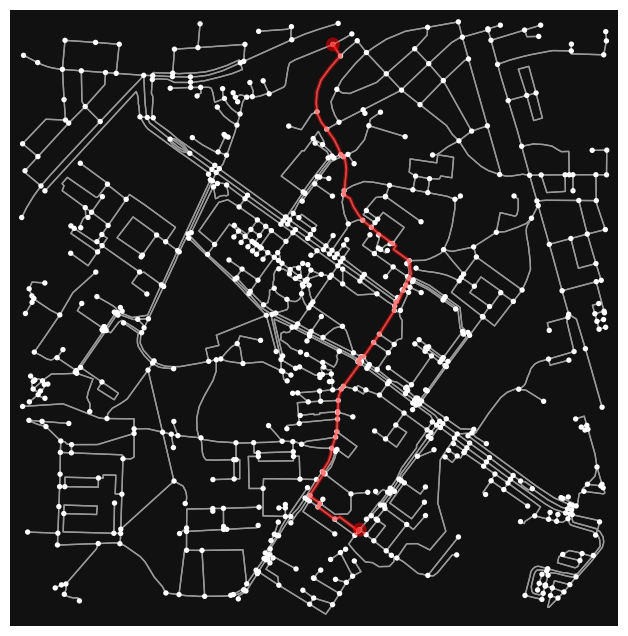

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [42]:
# 그래프에서 가장 가까운 노드 찾기
start_node = ox.distance.nearest_nodes(network, start_coords[1], start_coords[0])  # (경도, 위도)
end_node = ox.distance.nearest_nodes(network, end_coords[1], end_coords[0])

# 다익스트라 실행 시간 측정
start_time = time.time()
# 다익스트라 알고리즘 실행
dijkstra_path, dijkstra_distance = dijkstra_algorithm(network, start_node, end_node)
dijkstra_time = time.time() - start_time


print("Shortest Path:", dijkstra_path)
print("Total Distance (m):", dijkstra_distance)
print(f"Dijkstra Execution Time: {dijkstra_time:.4f} seconds")
ox.plot_graph_route(network, route=dijkstra_path, route_linewidth=3)




In [9]:
def bellman_ford_algorithm(graph, start_node, end_node):
    # 최단 거리 테이블 초기화
    distances = {node: float('inf') for node in graph.nodes}
    predecessors = {node: None for node in graph.nodes}  # 경로 추적을 위한 이전 노드 저장
    distances[start_node] = 0  # 출발 노드의 최단 거리는 0

    # 노드 개수
    num_nodes = len(graph.nodes)

    # 모든 엣지에 대해 (노드 개수 - 1)번 반복
    for _ in range(num_nodes - 1):
        for u, v, edge_data in graph.edges(data=True):
            weight = edge_data['length']  # 엣지 가중치
            if distances[u] + weight < distances[v]:
                distances[v] = distances[u] + weight
                predecessors[v] = u

    # 음수 사이클 확인 (선택 사항)
    for u, v, edge_data in graph.edges(data=True):
        weight = edge_data['length']
        if distances[u] + weight < distances[v]:
            raise ValueError("Negative weight cycle detected")

    # 최단 경로 추적
    path = []
    current_node = end_node
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]

    return path[::-1], distances[end_node]  # 최단 경로와 해당 경로의 거리 반환


Shortest Path (Bellman-Ford): [4403766720, 4397580808, 4397580804, 4658273077, 8973274219, 4658273085, 4748296114, 4397573189, 3958352345, 3958352355, 4397573197, 4397573199, 4403766744, 4655491016, 4631157953, 3958352364, 4403766743, 3958352372, 4658272692, 4748267385, 4658272691, 4400580266, 6091601583, 6091601552, 6089623919, 4400580272, 4727599737, 4403782450, 4658272991, 8973274228, 4400580297, 4655491145, 4403782532, 4655491159, 4655491162, 4655491163, 7619762519, 4402717748, 4437127631, 4403782535, 2968495412, 4655489705, 4402717708, 4402717707]
Total Distance (m): 1199.9669999999999
Bellman-Ford Execution Time: 0.5988 seconds


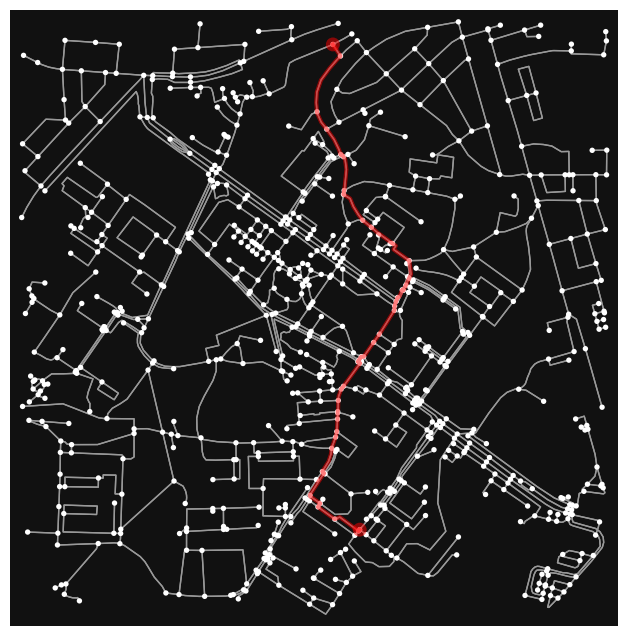

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [10]:
# 그래프에서 가장 가까운 노드 찾기
start_node = ox.distance.nearest_nodes(network, start_coords[1], start_coords[0])  # (경도, 위도)
end_node = ox.distance.nearest_nodes(network, end_coords[1], end_coords[0])

# 벨만-포드 실행 시간 측정
start_time = time.time()

# 벨만-포드 알고리즘 실행
bellman_ford_path, bellman_ford_distance = bellman_ford_algorithm(network, start_node, end_node)
bellman_ford_time = time.time() - start_time

# 결과 출력
print("Shortest Path (Bellman-Ford):", bellman_ford_path)
print("Total Distance (m):", bellman_ford_distance)
print(f"Bellman-Ford Execution Time: {bellman_ford_time:.4f} seconds")

# 경로 시각화
ox.plot_graph_route(network, route=bellman_ford_path, route_linewidth=3)


The paths are identical.
The total distances are identical.


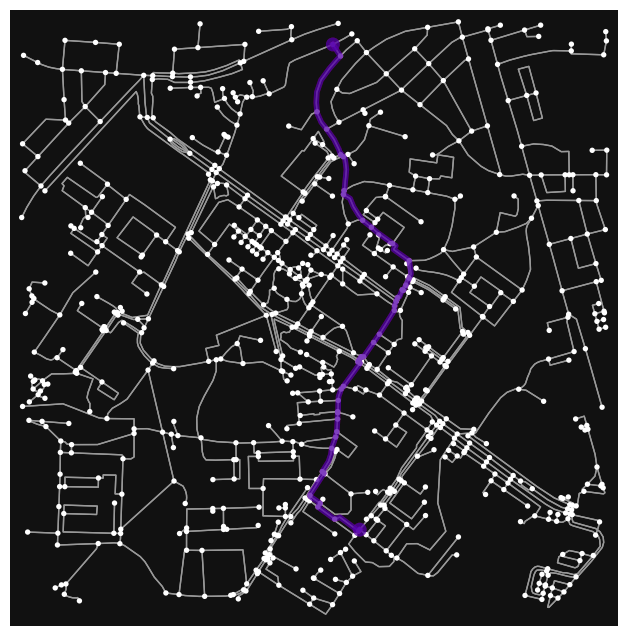

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [11]:
# 경로 비교
if dijkstra_path == bellman_ford_path:
    print("The paths are identical.")
else:
    print("The paths are different.")
    print("Dijkstra Path:", dijkstra_path)
    print("Bellman-Ford Path:", bellman_ford_path)

# 총 거리 비교
if dijkstra_distance == bellman_ford_distance:
    print("The total distances are identical.")
else:
    print("The total distances are different.")
    print(f"Dijkstra Distance: {dijkstra_distance} meters")
    print(f"Bellman-Ford Distance: {bellman_ford_distance} meters")

# 두 경로를 시각적으로 비교
ox.plot_graph_routes(
    network,
    routes=[dijkstra_path, bellman_ford_path],
    route_colors=['red', 'blue'],  # 다익스트라는 빨간색, 벨만-포드는 파란색
    route_linewidth=3,
)



In [12]:
from torch_geometric.utils import from_networkx
import torch

# 필요한 속성 정의
default_value = 0.0  # 누락된 속성의 기본값
required_attributes = list(set(attr for _, _, edge_data in network.edges(data=True) for attr in edge_data.keys()))

# 모든 엣지를 반복하면서 속성 정규화
for u, v, edge_data in network.edges(data=True):
    for attr in required_attributes:
        if attr not in edge_data:
            edge_data[attr] = default_value  # 누락된 속성을 기본값으로 채움

# 정규화된 그래프를 PyTorch Geometric으로 변환
graph_data = from_networkx(network)

# 노드 특성 추가 (좌표 정보)
node_features = []
for node_id, node_data in network.nodes(data=True):
    node_features.append([node_data['x'], node_data['y']])
graph_data.x = torch.tensor(node_features, dtype=torch.float32)

# 엣지 특성 추가 (길이 정보)
edge_lengths = []
for u, v, edge_data in network.edges(data=True):
    edge_lengths.append(edge_data['length'] if 'length' in edge_data else 0.0)
graph_data.edge_attr = torch.tensor(edge_lengths, dtype=torch.float32)

# 그래프 데이터 확인
print(graph_data)


/home/gyuha_lee/miniconda3/envs/oldandnew/lib/python3.9/site-packages/torch_geometric/typing.py:68: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /home/gyuha_lee/miniconda3/envs/oldandnew/lib/python3.9/site-packages/libpyg.so: undefined symbol: _ZNK5torch8autograd4Node4nameEv
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/home/gyuha_lee/miniconda3/envs/oldandnew/lib/python3.9/site-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /home/gyuha_lee/miniconda3/envs/oldandnew/lib/python3.9/site-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSsb
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/home/gyuha_lee/miniconda3/envs/oldandnew/lib/python3.9/site-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. S

Data(x=[797, 2], edge_index=[2, 2068], y=[797], street_count=[797], osmid=[2068], name=[2068], highway=[2068], oneway=[2068], reversed=[2068], length=[2068], width=[2068], service=[2068], geometry=[2068], created_date='2024-11-21 23:41:34', created_with='OSMnx 1.9.4', crs='epsg:4326', simplified=True, edge_attr=[2068])


In [13]:
import torch.nn as nn
from torch_geometric.nn import GCNConv

class GNNDistancePredictor(nn.Module):
    def __init__(self):
        super(GNNDistancePredictor, self).__init__()
        # GCN 레이어
        self.gcn1 = GCNConv(2, 64)  # 입력: 노드 좌표 (2차원), 출력: 64차원 노드 임베딩
        self.gcn2 = GCNConv(64, 32)
        
        # 최종 회귀 레이어
        self.fc = nn.Sequential(
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)  # 최종 출력: 거리 값
        )

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        # GCN 레이어를 통해 노드 특성 학습
        x = self.gcn1(x, edge_index)
        x = nn.ReLU()(x)
        x = self.gcn2(x, edge_index)
        x = nn.ReLU()(x)

        # 각 노드 쌍 간의 거리 예측
        x = self.fc(x)
        return x


In [19]:
from torch_geometric.loader import DataLoader
import torch.optim as optim

# 데이터 로더 생성
train_loader = DataLoader([graph_data], batch_size=1, shuffle=True)

# 모델 초기화
model = GNNDistancePredictor()
criterion = nn.MSELoss()  # 손실 함수: 평균 제곱 오차
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 루프
epochs = 150
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for data in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, data.y)  # 라벨(data.y)와 출력 비교
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")


Epoch 1/150, Loss: 1627.9934
Epoch 2/150, Loss: 1574.0364
Epoch 3/150, Loss: 1526.3304
Epoch 4/150, Loss: 1481.2861
Epoch 5/150, Loss: 1437.8630
Epoch 6/150, Loss: 1395.9967
Epoch 7/150, Loss: 1362.6239
Epoch 8/150, Loss: 1334.2161
Epoch 9/150, Loss: 1305.6537
Epoch 10/150, Loss: 1277.8408
Epoch 11/150, Loss: 1249.9490
Epoch 12/150, Loss: 1223.6476
Epoch 13/150, Loss: 1200.3788
Epoch 14/150, Loss: 1176.8452
Epoch 15/150, Loss: 1153.9437
Epoch 16/150, Loss: 1141.1627
Epoch 17/150, Loss: 1127.6426
Epoch 18/150, Loss: 1113.3201
Epoch 19/150, Loss: 1098.2626
Epoch 20/150, Loss: 1083.8772
Epoch 21/150, Loss: 1069.5935
Epoch 22/150, Loss: 1054.3903
Epoch 23/150, Loss: 1038.3367
Epoch 24/150, Loss: 1023.0168
Epoch 25/150, Loss: 1006.4635
Epoch 26/150, Loss: 988.3524
Epoch 27/150, Loss: 968.9355
Epoch 28/150, Loss: 949.0583
Epoch 29/150, Loss: 929.3188
Epoch 30/150, Loss: 908.7944
Epoch 31/150, Loss: 887.5217
Epoch 32/150, Loss: 865.5335
Epoch 33/150, Loss: 842.8605
Epoch 34/150, Loss: 819.531

In [48]:
import torch
from torch_geometric.data import Data

# 새로운 출발지와 도착지 좌표로 예측
test_coords = torch.tensor([[127.456, 36.628, 127.458, 36.630]], dtype=torch.float32)

# 테스트용 데이터를 Data 객체로 감싸기
# 여기서는 1개의 엣지만 사용하므로, edge_index는 (2, 1) 크기로 정의됩니다.
edge_index = torch.tensor([[0], [1]], dtype=torch.long)  # 1개의 엣지 (0 -> 1)

# 실제 그래프에서는 다수의 엣지를 다뤄야 하므로, edge_index를 적절히 확장해야 합니다.
test_data = Data(x=test_coords, edge_index=edge_index)

# 모델 평가 모드로 전환
model.eval()

# 예측 (AI 모델)
with torch.no_grad():
    predicted_distance = model(test_data).item()

print(f"Predicted Distance (AI): {predicted_distance:.2f} meters")

# Step 2의 다익스트라 알고리즘 결과와 비교
_, actual_distance = dijkstra_algorithm(network, start_node, end_node)
print(f"Actual Distance (Dijkstra): {actual_distance:.2f} meters")


RuntimeError: index 1 is out of bounds for dimension 0 with size 1

# 흐앙 어렵네 안해 그냥 MLP로 끝내자